In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-academic-performance-dataset/StudentsPerformance.csv


> **To identify which demographic, socio-economic, and academic preparation factors have the strongest influence on student academic performance, and to understand patterns in math, reading, and writing scores.**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid", palette="pastel")
df = pd.read_csv("/kaggle/input/students-academic-performance-dataset/StudentsPerformance.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print("\n--- Data Info ---")
print(df.info())

print("\n--- Summary Statistics ---")
print(df.describe())


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None

--- Summary Statistics ---
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.0000

In [6]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


# EDA

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


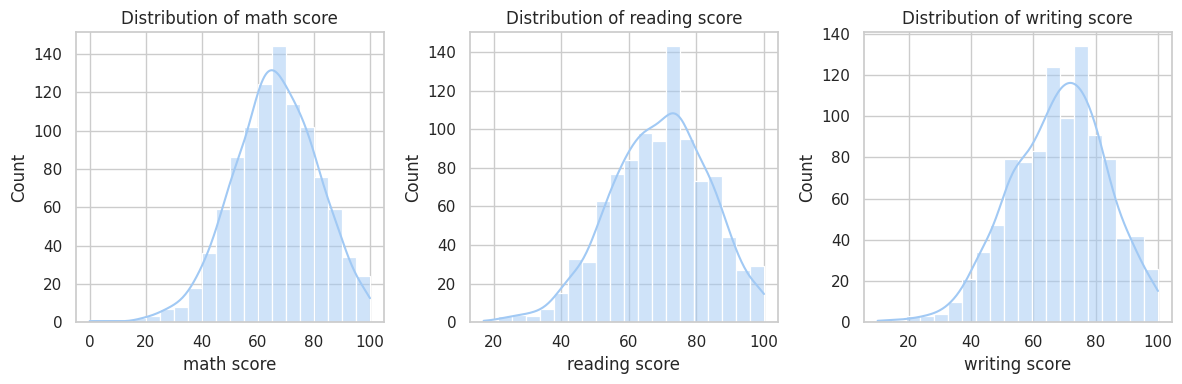

In [7]:
# Distribution of Scores

plt.figure(figsize=(12,4))
for i, col in enumerate(["math score", "reading score", "writing score"]):
    plt.subplot(1,3,i+1)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

**How male vs. female students perform on average.**

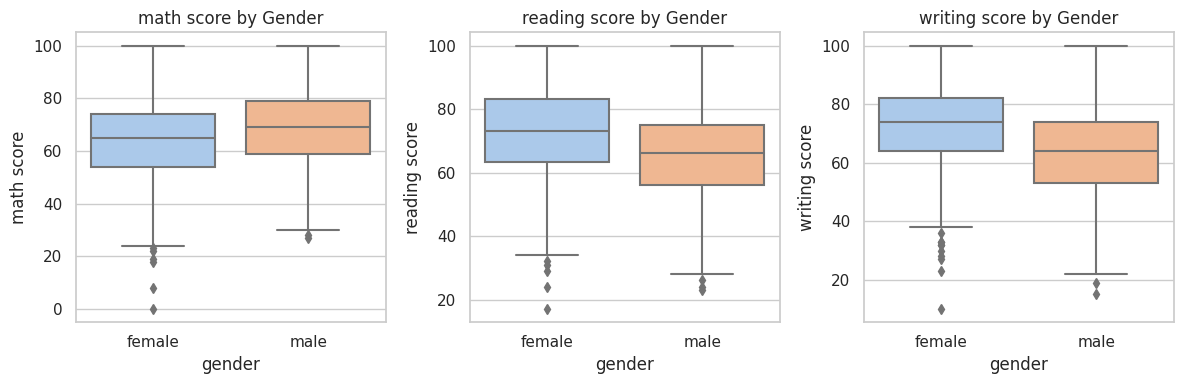

In [8]:
# Gender vs Scores

plt.figure(figsize=(12,4))
for i, col in enumerate(["math score", "reading score", "writing score"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(x="gender", y=col, data=df)
    plt.title(f"{col} by Gender")
plt.tight_layout()
plt.show()

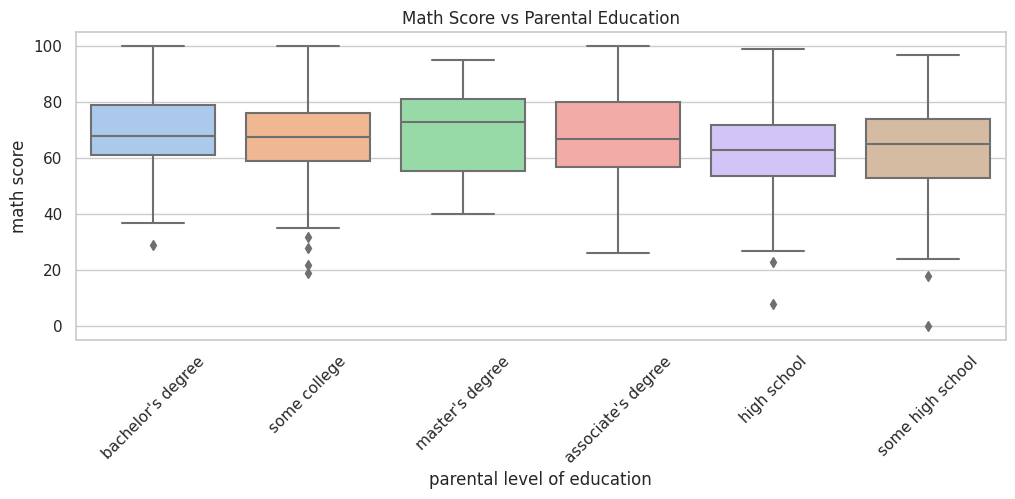

In [9]:
#  Parental Education vs Scores

plt.figure(figsize=(12,4))
sns.boxplot(x="parental level of education", 
            y="math score", 
            data=df)
plt.xticks(rotation=45)
plt.title("Math Score vs Parental Education")
plt.show()

**Whether completing test prep improves performance.**

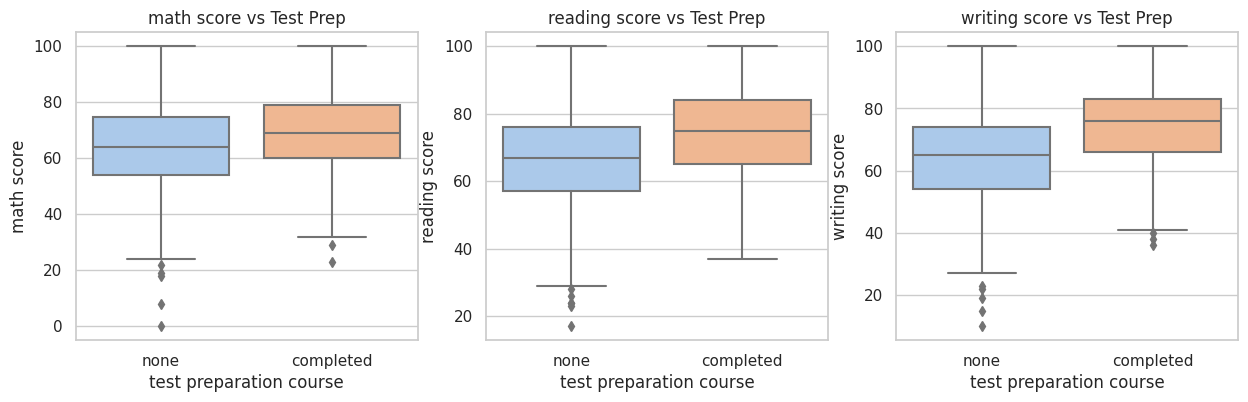

In [10]:
#  Test Preparation Impact

fig, ax = plt.subplots(1,3, figsize=(15,4))
scores = ["math score", "reading score", "writing score"]

for i, col in enumerate(scores):
    sns.boxplot(x="test preparation course", y=col, data=df, ax=ax[i])
    ax[i].set_title(f"{col} vs Test Prep")

plt.show()

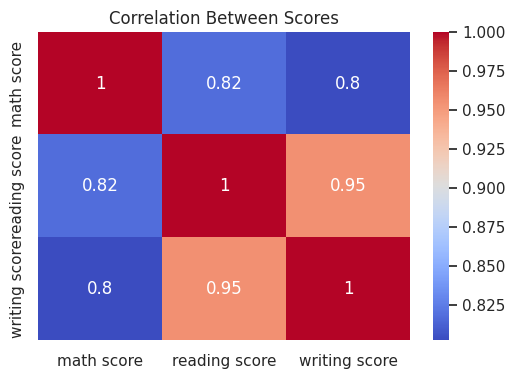

In [11]:
# Correlation Heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df[["math score","reading score","writing score"]].corr(), 
            annot=True, cmap="coolwarm")
plt.title("Correlation Between Scores")
plt.show()

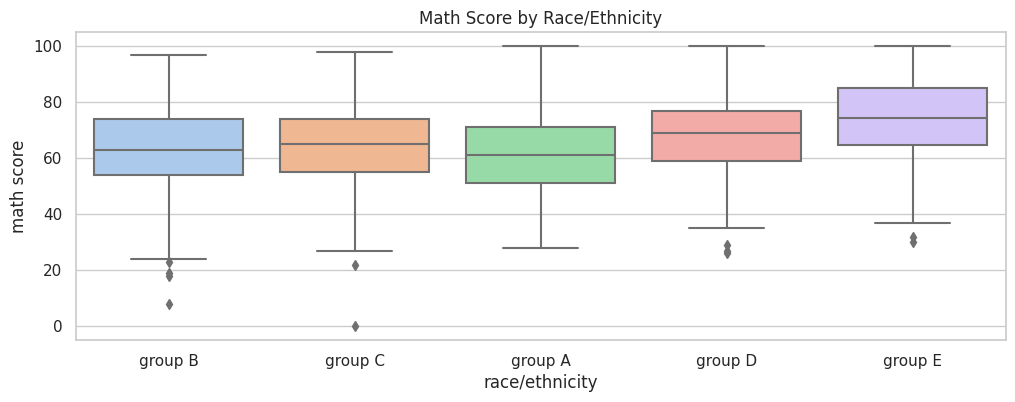

In [12]:
# Race/Ethnicity vs Scores

plt.figure(figsize=(12,4))
sns.boxplot(x="race/ethnicity", y="math score", data=df)
plt.title("Math Score by Race/Ethnicity")
plt.show()

**Overall performance level and how scores are spread.**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


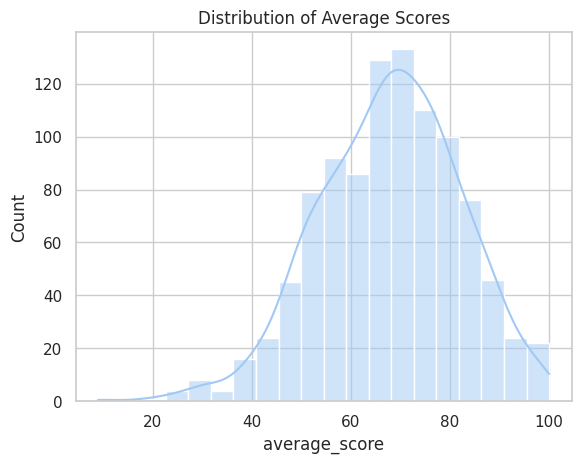


Top Performing Students:
     gender race/ethnicity parental level of education     lunch  \
916    male        group E           bachelor's degree  standard   
458  female        group E           bachelor's degree  standard   
962  female        group E          associate's degree  standard   
114  female        group E           bachelor's degree  standard   
179  female        group D            some high school  standard   

    test preparation course  math score  reading score  writing score  \
916               completed         100            100            100   
458                    none         100            100            100   
962                    none         100            100            100   
114               completed          99            100            100   
179               completed          97            100            100   

     total_score  average_score  
916          300     100.000000  
458          300     100.000000  
962          300     100

In [13]:
#  Combined Total Score

df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average_score"] = df["total_score"] / 3

sns.histplot(df["average_score"], kde=True, bins=20)
plt.title("Distribution of Average Scores")
plt.show()

print("\nTop Performing Students:")
print(df.sort_values("average_score", ascending=False).head())


Summary of Insights 

1. Overall scores are centered in the mid-high range, showing generally good performance.
2. Female students tend to outperform males, particularly in reading and writing.Completing the test preparation course significantly boosts performance.
3. Higher parental education is strongly associated with higher student achievement.
4. Reading and writing are strongly correlated, implying strong literacy as a key success factor.


# PREDICTION

**Building a Pass/Fail Classification model**

In [21]:
!pip install catboost --quiet


In [22]:
from catboost import CatBoostClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [25]:
# Create Pass/Fail label
df["total_score"] = df["math score"] + df["reading score"] + df["writing score"]
df["average_score"] = df["total_score"] / 3
df["pass_fail"] = (df["average_score"] >= 50).astype(int)  # 1 = Pass, 0 = Fail

# Features (categorical features only for CatBoost)
X = df[["gender","race/ethnicity","parental level of education","lunch","test preparation course"]]
y = df["pass_fail"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# CatBoost Classifier
cat_clf = CatBoostClassifier(iterations=300, learning_rate=0.1, depth=4, verbose=0)
cat_clf.fit(X_train, y_train, cat_features=list(X.columns))



Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.86      0.99      0.92       173

    accuracy                           0.86       200
   macro avg       0.43      0.50      0.46       200
weighted avg       0.75      0.86      0.80       200



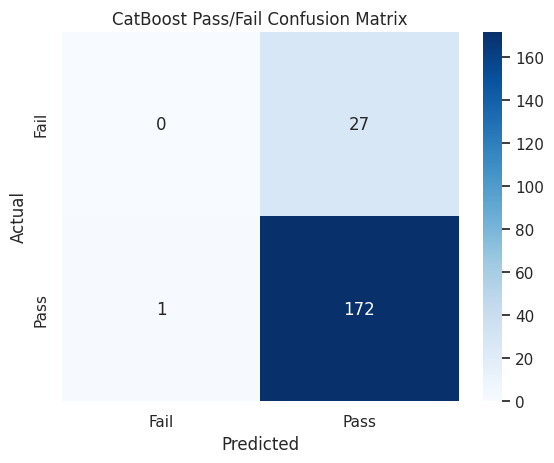

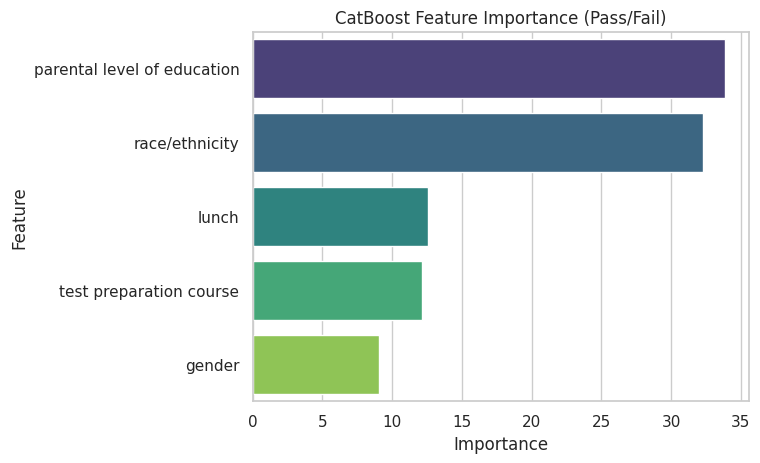


Top Features Affecting Pass/Fail Prediction:
                       Feature  Importance
2  parental level of education   33.854830
1               race/ethnicity   32.310907
3                        lunch   12.610056
4      test preparation course   12.172902
0                       gender    9.051304


In [26]:
# Predictions
y_pred = cat_clf.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fail","Pass"], yticklabels=["Fail","Pass"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("CatBoost Pass/Fail Confusion Matrix")
plt.show()

# Feature Importance
feat_imp = pd.DataFrame({
    "Feature": X.columns,
    "Importance": cat_clf.get_feature_importance()
}).sort_values("Importance", ascending=False)

sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="viridis")
plt.title("CatBoost Feature Importance (Pass/Fail)")
plt.show()

print("\nTop Features Affecting Pass/Fail Prediction:")
print(feat_imp)

* Socio-economic factors (parental education, lunch, race/ethnicity) are the main drivers of passing.
* Test prep has a moderate positive effect.
* Gender has little influence.
* Dataset imbalance causes the model to mostly predict Pass.